In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import score_cluster
import score_physics
from plotting import *

from scipy.optimize import curve_fit

In [6]:
df = pd.read_csv("result_truth_20.csv")

In [64]:
ievent = 1
iparticle=1001
itrack = 1003

df_event=df.loc[df['event']==ievent]
df_particle=df_event[df['particle']==iparticle]
df_track=df_event[df['track']==itrack]

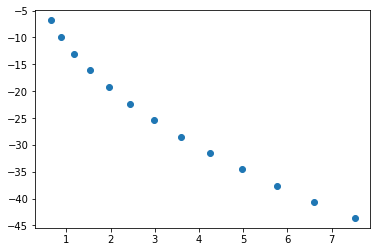

In [225]:
x=df_track['x'].values
y=df_track['y'].values

plt.scatter(x,y)
plt.show()

In [226]:
x,y

(array([ 0.64975865,  0.88263723,  1.17778935,  1.53509818,  1.95442205,
         2.43559448,  2.97842424,  3.58269543,  4.24816759,  4.97457574,
         5.76163057,  6.60901845,  7.51640166]),
 array([ -6.8088364 ,  -9.92490284, -13.03571995, -16.1400433 ,
        -19.23663108, -22.32424453, -25.40164844, -28.46761169,
        -31.52090768, -34.56031488, -37.58461726, -40.59260485, -43.58307414]))

In [339]:
def rotateToQuadrant(x,y):
    seedx=x[1]-x[0]
    seedy=y[1]-y[0]
    phi0=np.arctan2(y[0],x[0])
    phi1=np.arctan2(seedy,seedx)
    phi=phi1
    c, s = np.cos(-phi), np.sin(-phi)
    xr=c*x-s*y
    yr=s*x+c*y
    print phi
    return xr,yr

def func(x, r, vx, vy):
    return r - np.sqrt(r**2-(x-vx)**2) + vy

-1.49620020722


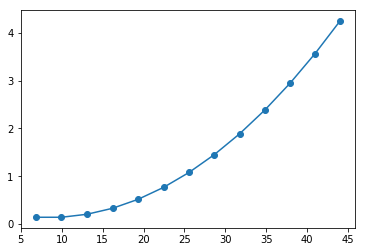

In [340]:
xr,yr=rotateToQuadrant(x,y)
plt.scatter(xr,yr)
plt.plot(xr,yr)
plt.show()

In [341]:
popt, pcov = curve_fit(func, xr, yr, p0=[200.,0.,0.], bounds=([5.,-25.,-25.], [1000., 25, 25]))

In [342]:
popt

array([  1.56249093e+02,   8.40035740e+00,   1.32694799e-01])

In [343]:
x,y

(array([ 0.64975865,  0.88263723,  1.17778935,  1.53509818,  1.95442205,
         2.43559448,  2.97842424,  3.58269543,  4.24816759,  4.97457574,
         5.76163057,  6.60901845,  7.51640166]),
 array([ -6.8088364 ,  -9.92490284, -13.03571995, -16.1400433 ,
        -19.23663108, -22.32424453, -25.40164844, -28.46761169,
        -31.52090768, -34.56031488, -37.58461726, -40.59260485, -43.58307414]))

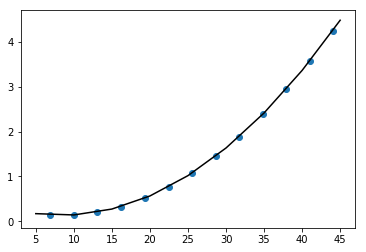

In [344]:
xp=np.arange(5.,50.,5.)
plt.plot(xp,func(xp,popt[0],popt[1],popt[2]),'k')
plt.scatter(xr,yr)
plt.show()

In [345]:
popt

array([  1.56249093e+02,   8.40035740e+00,   1.32694799e-01])